 ЛАБОРАТОРНАЯ РАБОТА №6. «ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ. ЗАДАЧА КЛАСТЕРИЗАЦИИ»

ЗАДАНИЕ №1
1. Сгенерировать 3 датасета (make_classification или make_blobs)
2. Провести визуализацию
3. Провести кластеризацию (все методы)
4. Для каждого метода подобрать оптимальные гиперпараметры.
5. Самостоятельно реализовать KMeans. Проверить его работу на датасетах.
6. Каждый метод оценивать 2 внешними и 2 внутренними метриками.

ЗАДАНИЕ №2.
1. На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.
2. Произвести визуализацию построенных моделей.
3. Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.


# Инициализация проекта

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, rand_score
from scipy.cluster.hierarchy import linkage, fcluster

import warnings
warnings.filterwarnings("ignore")

# Задание №1.

In [2]:
# Задаем параметры для первого датасета (make_classification)
X1, y1 = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Задаем параметры для второго датасета (make_blobs)
X2, y2 = make_blobs(n_samples=350, centers=2, cluster_std=1.0, random_state=42)

# Задаем параметры для третьего датасета (make_classification)
X3, y3 = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=42)

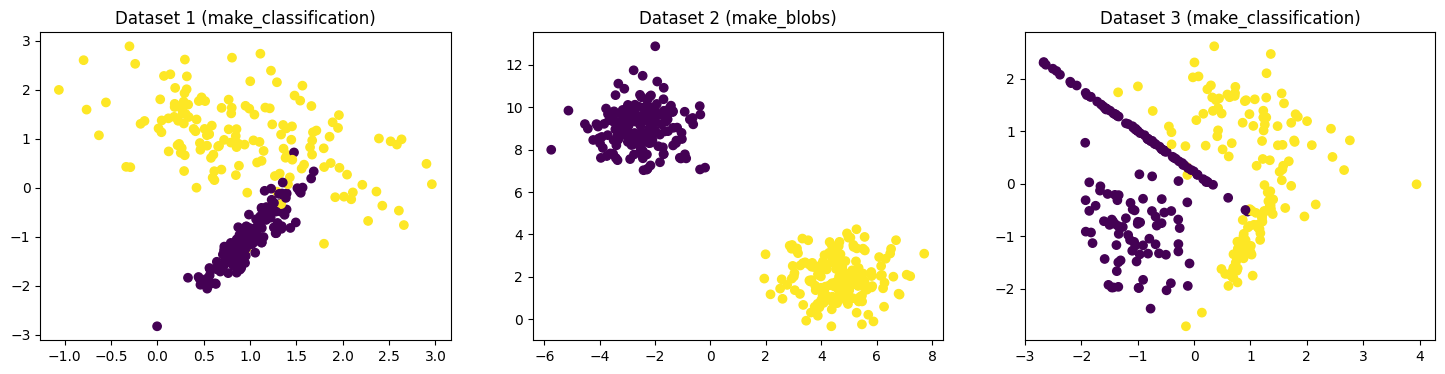

In [3]:
# Визуализация датасетов
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis')
plt.title('Dataset 1 (make_classification)')

plt.subplot(1, 3, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis')
plt.title('Dataset 2 (make_blobs)')

plt.subplot(1, 3, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis')
plt.title('Dataset 3 (make_classification)')

plt.show()

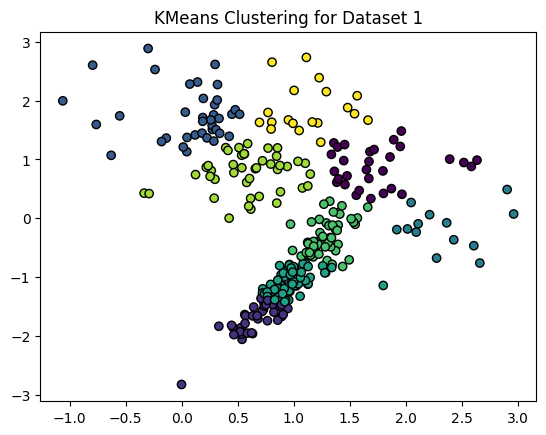

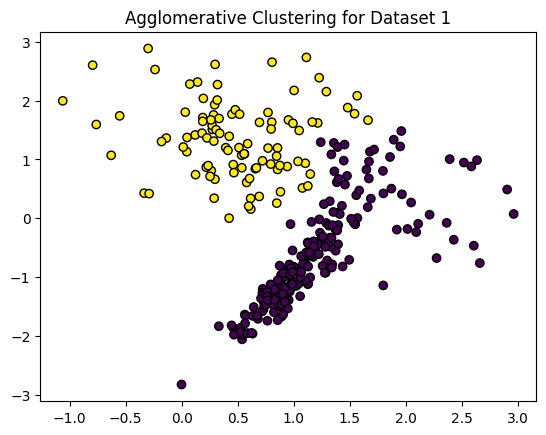

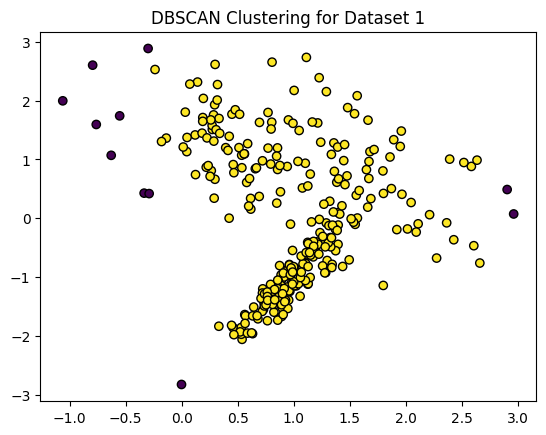

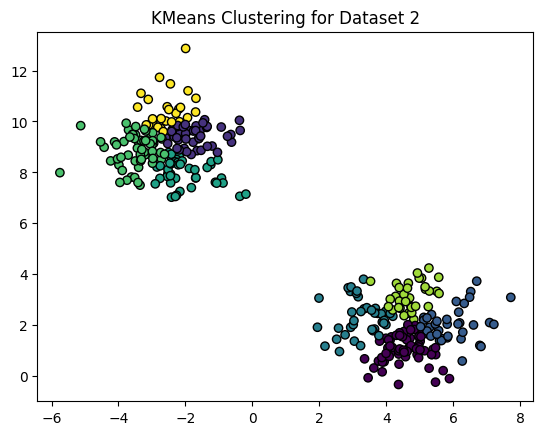

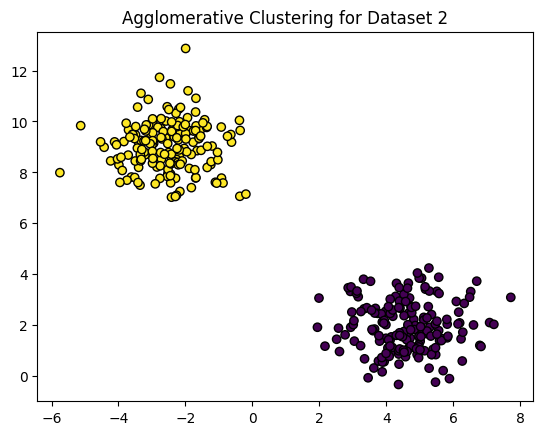

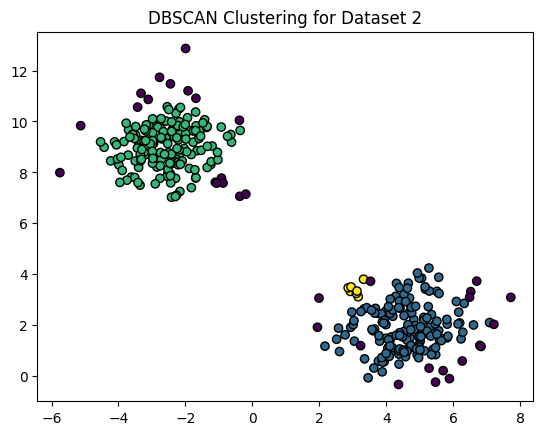

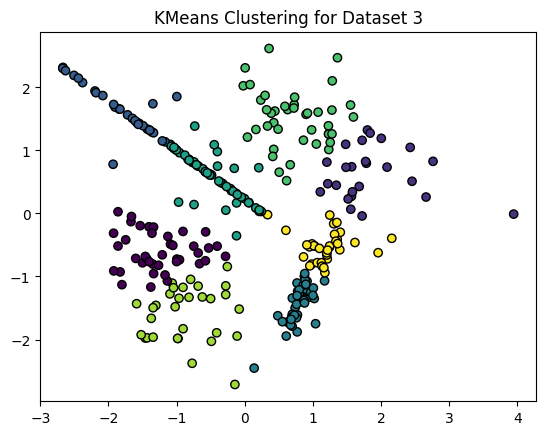

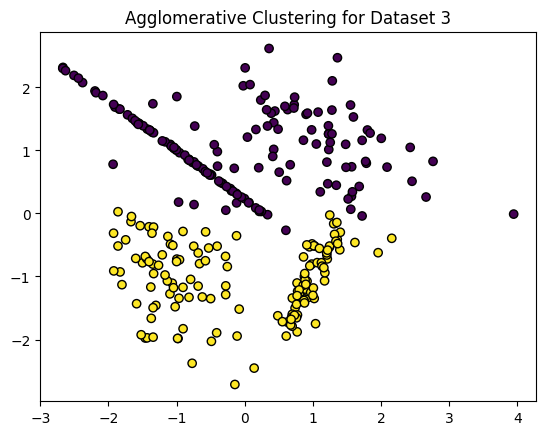

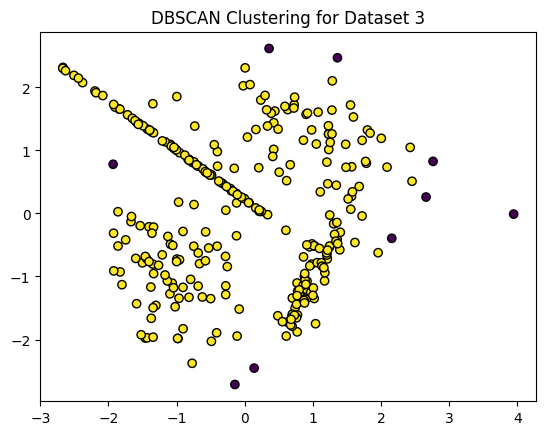

In [4]:
# Функция для визуализации кластеризации
def plot_clusters(X, y_pred, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Кластеризация для Dataset 1 (make_classification)
models = [KMeans(), AgglomerativeClustering(), DBSCAN(eps=0.5, min_samples=5)]
model_names = ['KMeans', 'Agglomerative', 'DBSCAN']

for model, name in zip(models, model_names):
    y_pred = model.fit_predict(X1)
    plot_clusters(X1, y_pred, f'{name} Clustering for Dataset 1')

# Кластеризация для Dataset 2 (make_blobs)
for model, name in zip(models, model_names):
    y_pred = model.fit_predict(X2)
    plot_clusters(X2, y_pred, f'{name} Clustering for Dataset 2')

# Кластеризация для Dataset 3 (make_classification)
for model, name in zip(models, model_names):
    y_pred = model.fit_predict(X3)
    plot_clusters(X3, y_pred, f'{name} Clustering for Dataset 3')


Вывод:

Нельзя проследить какую-либо зависимость или схожесть работы методов на этих датасетах. Во всех трёх случаях получились разные результаты


In [5]:
print("Первый датасет:")
# Подбор оптимальных гиперпараметров для KMeans
kmeans = KMeans()
kmeans_param_grid = {'n_clusters': [2, 3, 4, 5]}
kmeans_grid = GridSearchCV(kmeans, kmeans_param_grid, cv=5)
kmeans_grid.fit(X1)
print("Best Parameters for KMeans:", kmeans_grid.best_params_)

# Функция для вычисления коэффициента силуэта
def agglomerative_silhouette_score(n_clusters, X):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg
# Использование GridSearchCV с коэффициентом силуэта для Agglomerative Clustering
agg_param_grid = {'n_clusters': [2, 3, 4, 5]}
agg_grid = GridSearchCV(AgglomerativeClustering(), param_grid=agg_param_grid, cv=5, scoring='neg_mean_squared_error')
agg_grid.fit(X1)
print("Best Parametrs for Agglomerative Clustering:", agg_grid.best_params_)
print()

print("Второй датасет:")
# Подбор оптимальных гиперпараметров для KMeans
kmeans = KMeans()
kmeans_param_grid = {'n_clusters': [2, 3, 4, 5]}
kmeans_grid = GridSearchCV(kmeans, kmeans_param_grid, cv=5)
kmeans_grid.fit(X2)
print("Best Parameters for KMeans:", kmeans_grid.best_params_)

# Функция для вычисления коэффициента силуэта
def agglomerative_silhouette_score(n_clusters, X):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg
# Использование GridSearchCV с коэффициентом силуэта для Agglomerative Clustering
agg_param_grid = {'n_clusters': [2, 3, 4, 5]}
agg_grid = GridSearchCV(AgglomerativeClustering(), param_grid=agg_param_grid, cv=5, scoring='neg_mean_squared_error')
agg_grid.fit(X2)
print("Best Parametrs for Agglomerative Clustering:", agg_grid.best_params_)
print()

print("Третий датасет:")
# Подбор оптимальных гиперпараметров для KMeans
kmeans = KMeans()
kmeans_param_grid = {'n_clusters': [2, 3, 4, 5]}
kmeans_grid = GridSearchCV(kmeans, kmeans_param_grid, cv=5)
kmeans_grid.fit(X3)
print("Best Parameters for KMeans:", kmeans_grid.best_params_)

# Функция для вычисления коэффициента силуэта
def agglomerative_silhouette_score(n_clusters, X):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg
# Использование GridSearchCV с коэффициентом силуэта для Agglomerative Clustering
agg_param_grid = {'n_clusters': [2, 3, 4, 5]}
agg_grid = GridSearchCV(AgglomerativeClustering(), param_grid=agg_param_grid, cv=5, scoring='neg_mean_squared_error')
agg_grid.fit(X3)
print("Best Parametrs for Agglomerative Clustering:", agg_grid.best_params_)

Первый датасет:
Best Parameters for KMeans: {'n_clusters': 5}
Best Parametrs for Agglomerative Clustering: {'n_clusters': 2}

Второй датасет:
Best Parameters for KMeans: {'n_clusters': 5}
Best Parametrs for Agglomerative Clustering: {'n_clusters': 2}

Третий датасет:
Best Parameters for KMeans: {'n_clusters': 5}
Best Parametrs for Agglomerative Clustering: {'n_clusters': 2}


In [6]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iterations=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Инициализация центроидов
        self.centroids = X[np.random.choice(X.shape[0], size=self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            # Шаг 1: Вычисление расстояний до центроидов и присвоение кластеров
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Шаг 2: Обновление центроидов
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Проверка условия сходимости
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


# Инициализация и обучение KMeans
kmeans_custom = KMeansCustom(n_clusters=3)

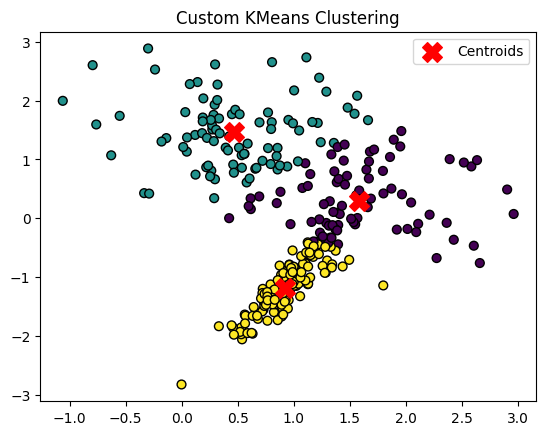

In [7]:
#Первый датасет

kmeans_custom.fit(X1)
# Получение предсказанных меток
labels_custom = kmeans_custom.predict(X1)
# Визуализация результатов
plt.scatter(X1[:, 0], X1[:, 1], c=labels_custom, cmap='viridis', edgecolors='k', s=40)
plt.scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Custom KMeans Clustering')
plt.legend()
plt.show()

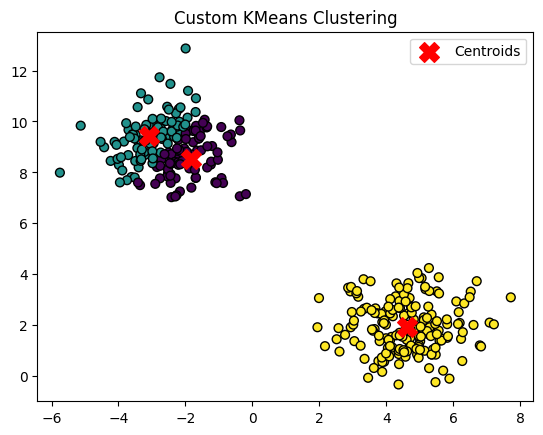

In [8]:
#Второй датасет

kmeans_custom.fit(X2)

# Получение предсказанных меток
labels_custom = kmeans_custom.predict(X2)

# Визуализация результатов
plt.scatter(X2[:, 0], X2[:, 1], c=labels_custom, cmap='viridis', edgecolors='k', s=40)
plt.scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Custom KMeans Clustering')
plt.legend()
plt.show()

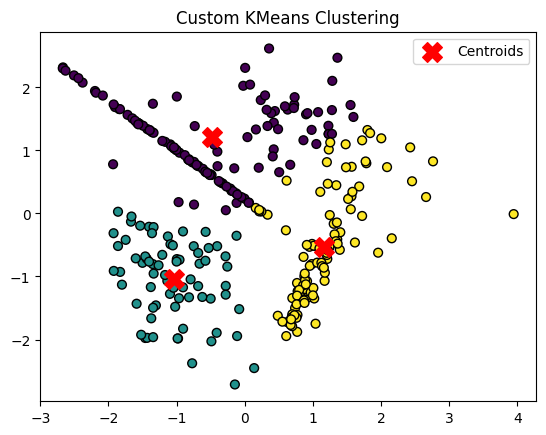

In [9]:
#Третий датасет

kmeans_custom.fit(X3)

# Получение предсказанных меток
labels_custom = kmeans_custom.predict(X3)

# Визуализация результатов
plt.scatter(X3[:, 0], X3[:, 1], c=labels_custom, cmap='viridis', edgecolors='k', s=40)
plt.scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Custom KMeans Clustering')
plt.legend()
plt.show()

### Результаты для первого датасета

In [10]:
# Метод KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X1)
silhouette_kmeans = silhouette_score(X1, kmeans_labels)
inertia_kmeans = kmeans.inertia_
ari_kmeans = adjusted_rand_score(y1, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y1, kmeans_labels)

# Метод Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X1)
silhouette_agg = silhouette_score(X1, agg_labels)
ari_agg = adjusted_rand_score(y1, agg_labels)
nmi_agg = normalized_mutual_info_score(y1, agg_labels)

# Метод DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X1)
silhouette_dbscan = silhouette_score(X1, dbscan_labels)
ari_dbscan = adjusted_rand_score(y1, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(y1, dbscan_labels)


# Вывод результатов
print("KMeans:")
print("Silhouette Score:", silhouette_kmeans)
print("Inertia:", inertia_kmeans)
print("Adjusted Rand Index:", ari_kmeans)
print("Normalized Mutual Information:", nmi_kmeans)
print()

print("Agglomerative Clustering:")
print("Silhouette Score:", silhouette_agg)
print("Adjusted Rand Index:", ari_agg)
print("Normalized Mutual Information:", nmi_agg)
print()

print("DBSCAN:")
print("Silhouette Score:", silhouette_dbscan)
print("Adjusted Rand Index:", ari_dbscan)
print("Normalized Mutual Information:", nmi_dbscan)

KMeans:
Silhouette Score: 0.48201398691135094
Inertia: 132.0792205756391
Adjusted Rand Index: 0.5007745070066942
Normalized Mutual Information: 0.525879805265944

Agglomerative Clustering:
Silhouette Score: 0.4403949740491015
Adjusted Rand Index: 0.4115553834188451
Normalized Mutual Information: 0.48251460110921074

DBSCAN:
Silhouette Score: 0.3430691518386769
Adjusted Rand Index: 0.0031289404536160603
Normalized Mutual Information: 0.0346036930417711


### Результаты для второго датасета

In [11]:
# Метод KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X2)
silhouette_kmeans = silhouette_score(X2, kmeans_labels)
inertia_kmeans = kmeans.inertia_
ari_kmeans = adjusted_rand_score(y2, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y2, kmeans_labels)

# Метод Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X2)
silhouette_agg = silhouette_score(X2, agg_labels)
ari_agg = adjusted_rand_score(y2, agg_labels)
nmi_agg = normalized_mutual_info_score(y2, agg_labels)

# Метод DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X2)
silhouette_dbscan = silhouette_score(X2, dbscan_labels)
ari_dbscan = adjusted_rand_score(y2, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(y2, dbscan_labels)


# Вывод результатов
print("KMeans:")
print("Silhouette Score:", silhouette_kmeans)
print("Inertia:", inertia_kmeans)
print("Adjusted Rand Index:", ari_kmeans)
print("Normalized Mutual Information:", nmi_kmeans)
print()

print("Agglomerative Clustering:")
print("Silhouette Score:", silhouette_agg)
print("Adjusted Rand Index:", ari_agg)
print("Normalized Mutual Information:", nmi_agg)
print()

print("DBSCAN:")
print("Silhouette Score:", silhouette_dbscan)
print("Adjusted Rand Index:", ari_dbscan)
print("Normalized Mutual Information:", nmi_dbscan)

KMeans:
Silhouette Score: 0.5801466896954988
Inertia: 553.9171512047974
Adjusted Rand Index: 0.759144237405107
Normalized Mutual Information: 0.804675066467607

Agglomerative Clustering:
Silhouette Score: 0.5721783533510909
Adjusted Rand Index: 0.7704243577809631
Normalized Mutual Information: 0.8100712215025969

DBSCAN:
Silhouette Score: 0.4261285625309701
Adjusted Rand Index: 0.7798795646753091
Normalized Mutual Information: 0.7278571955669166


### Результаты для третьего датасета

In [12]:
# Метод KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X3)
silhouette_kmeans = silhouette_score(X3, kmeans_labels)
inertia_kmeans = kmeans.inertia_
ari_kmeans = adjusted_rand_score(y3, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y3, kmeans_labels)

# Метод Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X3)
silhouette_agg = silhouette_score(X3, agg_labels)
ari_agg = adjusted_rand_score(y3, agg_labels)
nmi_agg = normalized_mutual_info_score(y3, agg_labels)

# Метод DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X3)
silhouette_dbscan = silhouette_score(X3, dbscan_labels)
ari_dbscan = adjusted_rand_score(y3, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(y3, dbscan_labels)


# Вывод результатов
print("KMeans:")
print("Silhouette Score:", silhouette_kmeans)
print("Inertia:", inertia_kmeans)
print("Adjusted Rand Index:", ari_kmeans)
print("Normalized Mutual Information:", nmi_kmeans)
print()

print("Agglomerative Clustering:")
print("Silhouette Score:", silhouette_agg)
print("Adjusted Rand Index:", ari_agg)
print("Normalized Mutual Information:", nmi_agg)
print()

print("DBSCAN:")
print("Silhouette Score:", silhouette_dbscan)
print("Adjusted Rand Index:", ari_dbscan)
print("Normalized Mutual Information:", nmi_dbscan)

KMeans:
Silhouette Score: 0.42277913801409106
Inertia: 331.56719197025404
Adjusted Rand Index: 0.3407165967187299
Normalized Mutual Information: 0.35299413218684644

Agglomerative Clustering:
Silhouette Score: 0.37385250805649756
Adjusted Rand Index: 0.16464377316346532
Normalized Mutual Information: 0.25117389528407547

DBSCAN:
Silhouette Score: 0.28011783381178523
Adjusted Rand Index: 0.00178917664119261
Normalized Mutual Information: 0.0256317371283987


# Задание №2.

In [16]:
data = pd.read_csv('csgo.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head(10)

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,bomb_planted_True
0,29.27,2.0,1.0,379.0,99.0,487.0,93.0,2050.0,100.0,0.0,1.0,0.0,5.0,1.0,1
1,22.70,3.0,1.0,100.0,149.0,100.0,175.0,1050.0,1250.0,1.0,2.0,1.0,1.0,2.0,1
2,37.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
3,17.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
4,24.84,3.0,3.0,67.0,0.0,96.0,0.0,2150.0,0.0,0.0,0.0,0.0,1.0,0.0,1
5,7.35,4.0,3.0,100.0,210.0,100.0,294.0,250.0,3350.0,1.0,3.0,1.0,1.0,3.0,1
6,35.30,6.0,4.0,371.0,360.0,371.0,400.0,10950.0,1600.0,2.0,4.0,3.0,4.0,4.0,1
7,15.30,6.0,4.0,338.0,260.0,366.0,300.0,11050.0,1250.0,2.0,3.0,3.0,4.0,3.0,1
8,24.94,4.0,14.0,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0,1
9,4.94,4.0,14.0,28.0,147.0,93.0,195.0,600.0,6850.0,0.0,2.0,1.0,1.0,2.0,1


In [17]:
X = data.drop('bomb_planted_True', axis=1).values
y = data['bomb_planted_True']

### KMeans

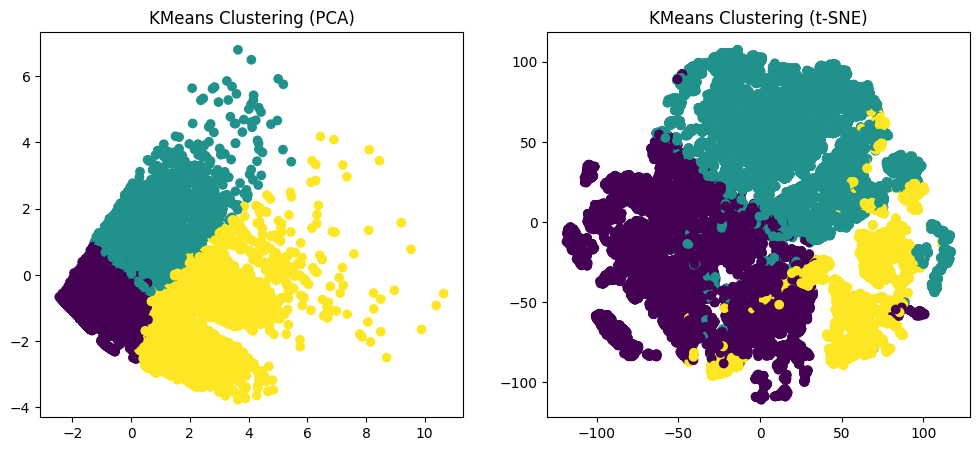

In [18]:
selected_features = ['time_left', 'ct_score', 't_score', 'ct_money', 't_money']
X = data[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans_clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('KMeans Clustering (PCA)')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('KMeans Clustering (t-SNE)')

plt.show()

### Результаты

In [19]:
print(f'silhouette_score: {round(silhouette_score(X, kmeans.labels_), 4)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X, kmeans.labels_), 4)}')
print(f'rand_score: {round(rand_score(kmeans.labels_, y), 4)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y, kmeans.labels_), 4)}')

silhouette_score: 0.0253
calinski_harabasz_score: 7696.3211
rand_score: 0.5342
adjusted_rand_score: 0.0685


### Иерархичекая кластеризация

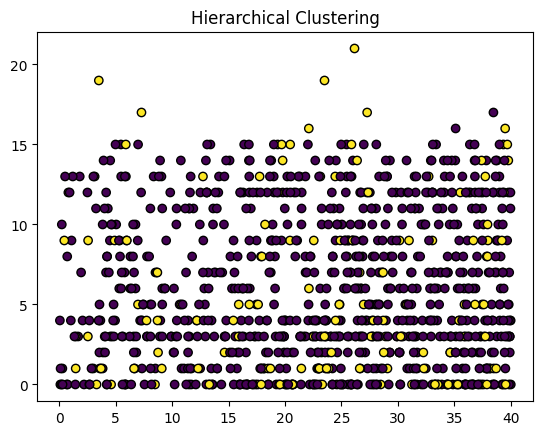

In [20]:
X_hierarchical = data.drop('bomb_planted_True', axis=1).values[:1000, :]
y_hierarchical = data['bomb_planted_True'][:1000]
linkage_one = linkage(X_hierarchical, method='ward')

agg_clustering = AgglomerativeClustering(n_clusters=2)
y_agg = agg_clustering.fit_predict(X_hierarchical)
plot_clusters(X_hierarchical, y_agg, 'Hierarchical Clustering')

### Результаты

In [21]:
num_clusters = 2
labels = fcluster(linkage_one, num_clusters, criterion='maxclust')
print(f'silhouette_score: {round(silhouette_score(X_hierarchical, labels), 4)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X_hierarchical, labels), 4)}')
print(f'rand_score: {round(rand_score(y_hierarchical, labels), 4)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y_hierarchical, labels), 4)}')

silhouette_score: 0.5957
calinski_harabasz_score: 1079.5631
rand_score: 0.7476
adjusted_rand_score: 0.0


### DBSCAN

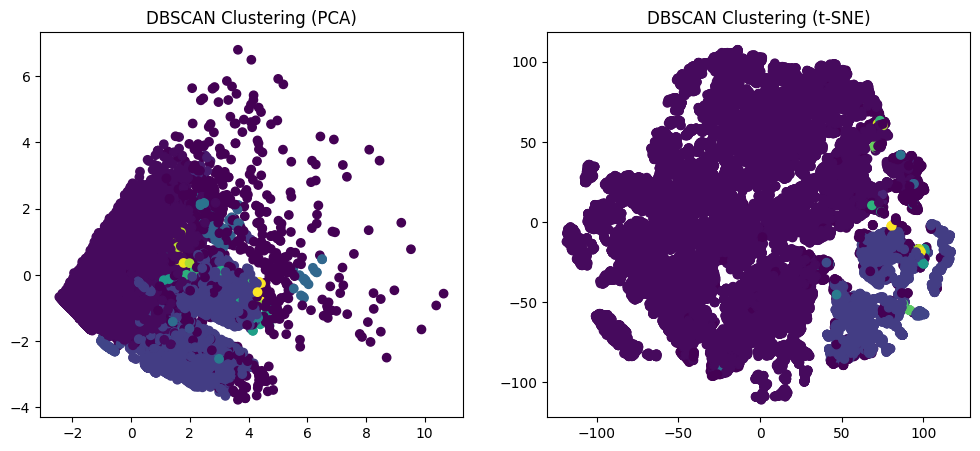

In [25]:
selected_features = ['time_left', 'ct_score', 't_score', 'ct_money', 't_money']
X = data[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering (PCA)')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering (t-SNE)')

plt.show()

### Результаты

In [26]:
print(f'silhouette_score: {round(silhouette_score(X, dbscan.labels_), 4)}')
print(f'calinski_harabasz_score: {round(calinski_harabasz_score(X, dbscan.labels_), 4)}')
print(f'rand_score: {round(rand_score(dbscan.labels_, y), 4)}')
print(f'adjusted_rand_score: {round(adjusted_rand_score(y, dbscan.labels_), 4)}')

silhouette_score: -0.6892
calinski_harabasz_score: 332.9928
rand_score: 0.5353
adjusted_rand_score: 0.0707


### Вывод:

Исходя из полученных результатов, можно сделать вывод, что основываясь на silhouette_score лучшей является "Иерархическая кластеризация".